In [23]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [24]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.3 leidenalg==0.8.3


In [25]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [36]:
adata = sc.read_csv("full_dataset_biexp_aligned.csv", first_column_names = True)

In [37]:
adata

AnnData object with n_obs × n_vars = 197160 × 16

In [39]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=15
    finished (0:00:00)


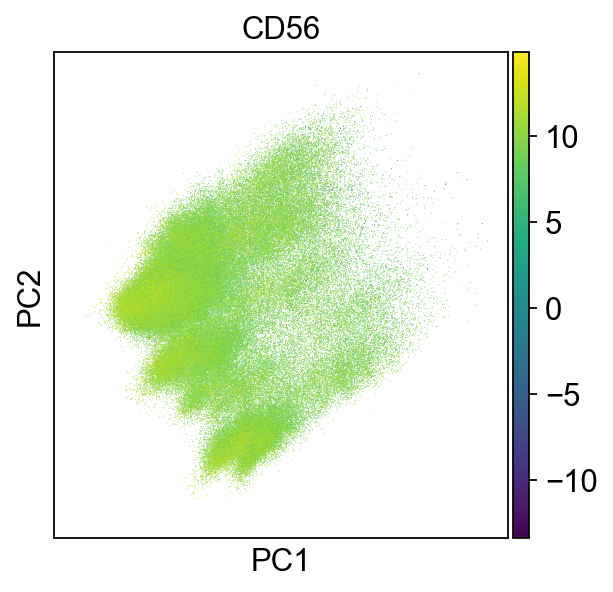

In [43]:
sc.pl.pca(adata, color='CD56')

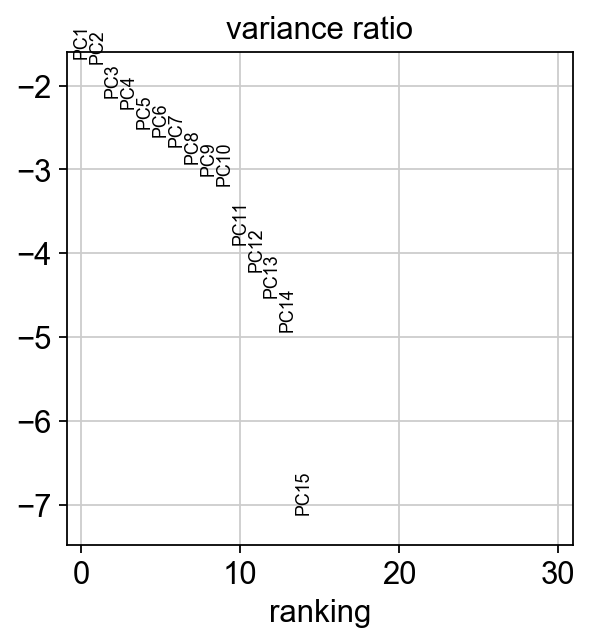

In [44]:
sc.pl.pca_variance_ratio(adata, log=True)

In [45]:
adata.write(results_file)

In [46]:
adata

AnnData object with n_obs × n_vars = 197160 × 16
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [47]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:29)


In [48]:
sc.tl.umap(adata)

computing UMAP


/Users/shahab/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:08:41)


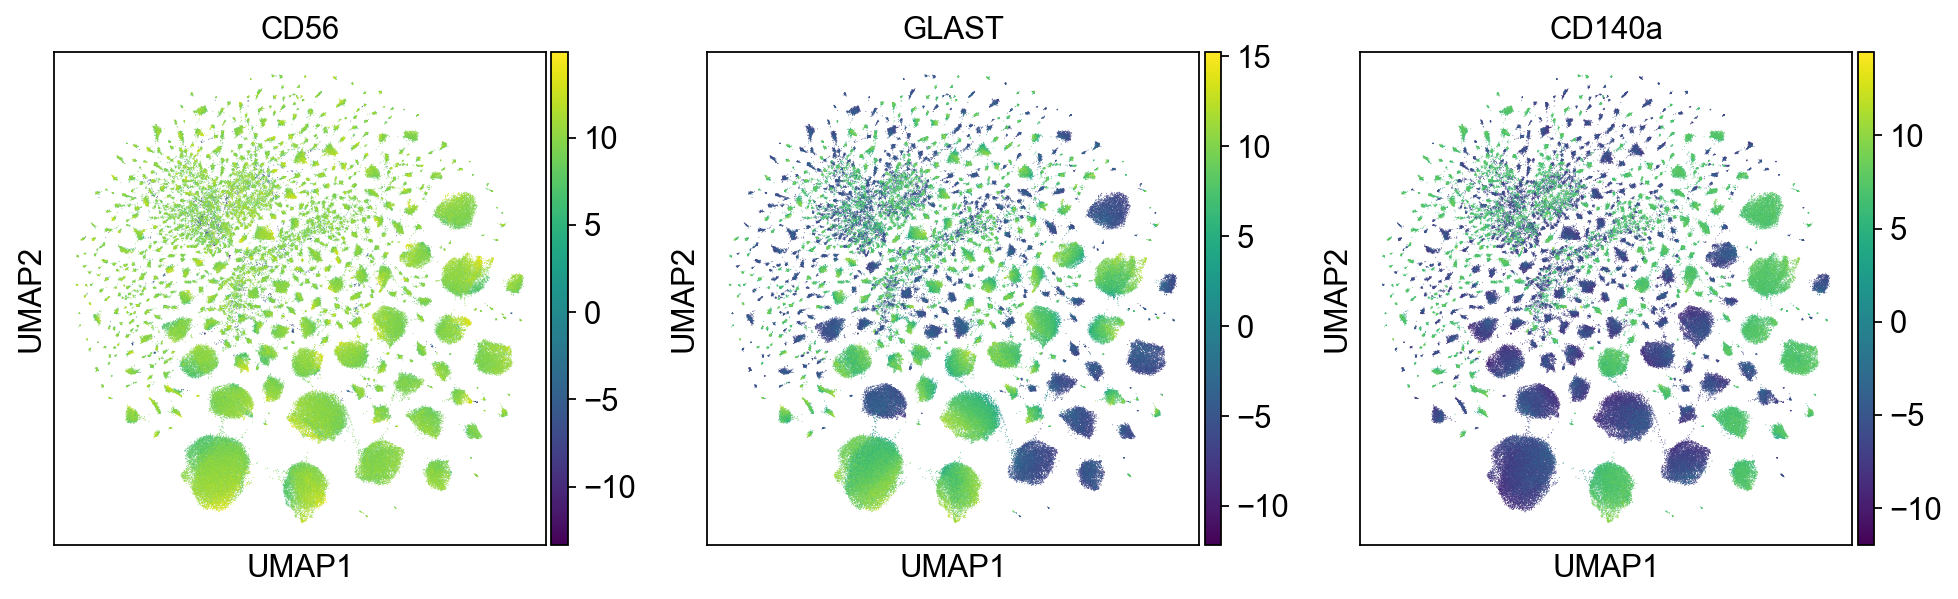

In [51]:
sc.pl.umap(adata, color=['CD56','GLAST','CD140a'])

In [52]:
adata.write(results_file)

In [54]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 239 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:40)


In [ ]:
sc.pl.umap(adata, color=['leiden', 'CD56','GLAST'])

the obs value 'leiden' has more than 103 categories. Uniform 'grey' color will be used for all categories.
